## 3.15 Homework

### Dataset

In this homework, we will continue the New York City Airbnb Open Data. You can take it from
[Kaggle](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data?select=AB_NYC_2019.csv)
or download from [here](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv)
if you don't want to sign up to Kaggle.

We'll keep working with the `'price'` variable, and we'll transform it to a classification task.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
data =r'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv'

In [3]:
df=pd.read_csv(data)

In [4]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
df.columns= df.columns.str.lower().str.replace(' ','_')
cat_cols = list(df.dtypes[df.dtypes=='object'].index)
for ix in cat_cols:
    df[ix]= df[ix].str.lower().str.replace(' ','_')

In [6]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

### Features

For the rest of the homework, you'll need to use the features from the previous homework with additional two `'neighbourhood_group'` and `'room_type'`. So the whole feature set will be set as follows:

* `'neighbourhood_group'`,
* `'room_type'`,
* `'latitude'`,
* `'longitude'`,
* `'price'`,
* `'minimum_nights'`,
* `'number_of_reviews'`,
* `'reviews_per_month'`,
* `'calculated_host_listings_count'`,
* `'availability_365'`

Select only them and fill in the missing values with 0.

In [7]:
df = df.fillna(0)

In [8]:
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [9]:
features = ['neighbourhood_group','room_type','latitude','longitude','price','minimum_nights','number_of_reviews','reviews_per_month',
            'calculated_host_listings_count','availability_365']
df = df[features]

In [10]:
df.head(4).T

,0,1,2,3
neighbourhood_group,brooklyn,manhattan,manhattan,brooklyn
room_type,private_room,entire_home/apt,private_room,entire_home/apt
latitude,40.64749,40.75362,40.80902,40.68514
longitude,-73.97237,-73.98377,-73.9419,-73.95976
price,149,225,150,89
minimum_nights,1,1,3,1
number_of_reviews,9,45,0,270
reviews_per_month,0.21,0.38,0.0,4.64
calculated_host_listings_count,6,2,1,1
availability_365,365,355,365,194


In [11]:
df.groupby('neighbourhood_group').agg('count')

,room_type,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
neighbourhood_group,,,,,,,,,
bronx,1091,1091,1091,1091,1091,1091,1091,1091,1091
brooklyn,20104,20104,20104,20104,20104,20104,20104,20104,20104
manhattan,21661,21661,21661,21661,21661,21661,21661,21661,21661
queens,5666,5666,5666,5666,5666,5666,5666,5666,5666
staten_island,373,373,373,373,373,373,373,373,373


In [12]:
df['neighbourhood_group'].unique()

array(['brooklyn', 'manhattan', 'queens', 'staten_island', 'bronx'],
      dtype=object)

### Question 1

What is the most frequent observation (mode) for the column `'neighbourhood_group'`?

### Answer:

In [13]:
df['neighbourhood_group'].mode()[0]

'manhattan'

### Split the data

* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Use Scikit-Learn for that (the `train_test_split` function) and set the seed to 42.
* Make sure that the target value ('price') is not in your dataframe.

In [14]:
from sklearn.model_selection import train_test_split
df_fulltrain,df_test = train_test_split(df,test_size=0.2,random_state=42)
df_train,df_val = train_test_split(df_fulltrain,test_size=0.25,random_state=42)

In [15]:
len(df),len(df_fulltrain),len(df_test),len(df_train),len(df_val)

(48895, 39116, 9779, 29337, 9779)

In [16]:
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

In [17]:
y_train = df_train.price.values
y_val = df_val.price.values
y_test = df_test.price.values

In [57]:
y_train = (y_train >= 152).astype(int)
y_val = (y_val >= 152).astype(int)
y_test = (y_test >= 152).astype(int)


In [18]:
del df_train['price']
del df_val['price']
del df_test['price']

In [19]:
df_train.head(4).T

,0,1,2,3
neighbourhood_group,brooklyn,manhattan,bronx,brooklyn
room_type,entire_home/apt,private_room,entire_home/apt,entire_home/apt
latitude,40.7276,40.70847,40.83149,40.66448
longitude,-73.94495,-74.00498,-73.92766,-73.99407
minimum_nights,3,1,40,2
number_of_reviews,29,0,0,3
reviews_per_month,0.7,0.0,0.0,0.08
calculated_host_listings_count,13,1,1,1
availability_365,50,7,0,0


### Question 2

* Create the [correlation matrix](https://www.google.com/search?q=correlation+matrix) for the numerical features of your train dataset.
   * In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.
* What are the two features that have the biggest correlation in this dataset?

Example of a correlation matrix for the car price dataset:

<img src="images/correlation-matrix.png" />

### Answer:

In [20]:
corrMatrix = round(df_train.corr(),2)

In [21]:
corrMatrix

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
latitude,1.00,0.08,0.03,-0.01,-0.01,0.02,-0.01
longitude,0.08,1.00,-0.06,0.06,0.13,-0.12,0.08
minimum_nights,0.03,-0.06,1.00,-0.08,-0.12,0.12,0.14
number_of_reviews,-0.01,0.06,-0.08,1.00,0.59,-0.07,0.17
reviews_per_month,-0.01,0.13,-0.12,0.59,1.00,-0.05,0.17
calculated_host_listings_count,0.02,-0.12,0.12,-0.07,-0.05,1.00,0.23
availability_365,-0.01,0.08,0.14,0.17,0.17,0.23,1.00


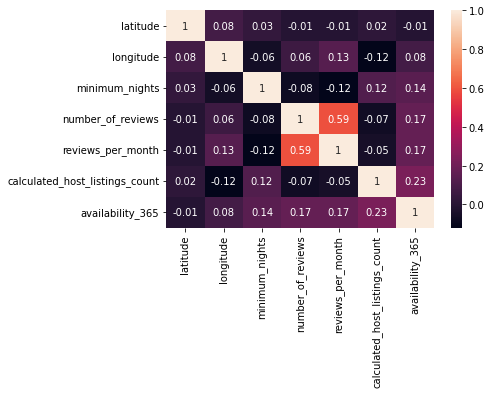

In [22]:
sn.heatmap(corrMatrix, annot=True)
plt.show()

### Make price binary

* We need to turn the price variable from numeric into binary.
* Let's create a variable `above_average` which is `1` if the price is above (or equal to) `152`.

In [28]:
df['above_average'] = (df['price']>=152).astype(int) 

In [24]:
df.head(3).T

,0,1,2
neighbourhood_group,brooklyn,manhattan,manhattan
room_type,private_room,entire_home/apt,private_room
latitude,40.64749,40.75362,40.80902
longitude,-73.97237,-73.98377,-73.9419
price,149,225,150
minimum_nights,1,1,3
number_of_reviews,9,45,0
reviews_per_month,0.21,0.38,0.0
calculated_host_listings_count,6,2,1
availability_365,365,355,365


In [29]:
from sklearn.model_selection import train_test_split
df_b_fulltrain,df_b_test = train_test_split(df,test_size=0.2,random_state=42)
df_b_train,df_b_val = train_test_split(df_b_fulltrain,test_size=0.25,random_state=42)

In [30]:
len(df),len(df_b_fulltrain),len(df_b_test),len(df_b_train),len(df_b_val)

(48895, 39116, 9779, 29337, 9779)

In [31]:
df_b_train = df_b_train.reset_index(drop = True)
df_b_val = df_b_val.reset_index(drop = True)
df_b_test = df_b_test.reset_index(drop = True)

In [32]:
y_b_train = df_b_train.above_average.values
y_b_val = df_b_val.above_average.values
y_b_test = df_b_test.above_average.values

In [44]:
df_b_train.drop(['price','above_average'], axis = 1, inplace=True)
df_b_val.drop(['price','above_average'], axis = 1, inplace=True)
df_b_test.drop(['price','above_average'], axis = 1, inplace=True)

### Question 3

* Calculate the mutual information score with the (binarized) price for the two categorical variables that we have. Use the training set only.
* Which of these two variables has bigger score?
* Round it to 2 decimal digits using `round(score, 2)`

### Answer:

In [46]:
from sklearn.metrics import mutual_info_score

In [47]:
categorical = list(df_b_train.dtypes[df_b_train.dtypes=='object'].index)

In [48]:
categorical

['neighbourhood_group', 'room_type']

In [49]:
for c in categorical:
    print('mutual info score for {} is : {}'.format(c,round(mutual_info_score(y_b_train,df_b_train[c]),2)))

mutual info score for neighbourhood_group is : 0.05
mutual info score for room_type is : 0.14


### Question 4

* Now let's train a logistic regression
* Remember that we have two categorical variables in the data. Include them using one-hot encoding.
* Fit the model on the training dataset.
   * To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
   * `model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)`
* Calculate the accuracy on the validation dataset and rount it to 2 decimal digits.

### Answer:

In [50]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [51]:
dv = DictVectorizer(sparse=False)

In [52]:
train_dict = df_b_train.to_dict(orient='records')

In [53]:
X_b_train  = dv.fit_transform(train_dict)

In [54]:
dv.get_feature_names()

['availability_365',
 'calculated_host_listings_count',
 'latitude',
 'longitude',
 'minimum_nights',
 'neighbourhood_group=bronx',
 'neighbourhood_group=brooklyn',
 'neighbourhood_group=manhattan',
 'neighbourhood_group=queens',
 'neighbourhood_group=staten_island',
 'number_of_reviews',
 'reviews_per_month',
 'room_type=entire_home/apt',
 'room_type=private_room',
 'room_type=shared_room']

In [55]:
val_dict = df_b_val.to_dict(orient='records')

In [56]:
X_b_val = dv.transform(val_dict)

In [57]:
model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)

In [59]:
model.fit(X_b_train,y_b_train)

c:\python\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [60]:
model.intercept_[0]

-0.002623753921713334

In [66]:
model.predict(X_b_train) # Hard Predictions

array([0, 0, 0, ..., 0, 0, 1])

In [67]:
y_pred = model.predict_proba(X_b_val)[:, 1]

In [115]:
(y_pred >= 0.5)

array([False,  True, False, ..., False, False,  True])

In [68]:
above_average_decision = (y_pred >= 0.5).astype(int)

In [116]:
(y_b_val == above_average_decision)

array([ True, False, False, ...,  True,  True, False])

In [74]:
original_accuracy = round((y_b_val == above_average_decision).mean(),2)

In [114]:
original_accuracy

0.79

### Question 5

* We have 9 features: 7 numerical features and 2 categorical.
* Let's find the least useful one using the *feature elimination* technique.
* Train a model with all these features (using the same parameters as in Q4).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature. 
* Which of following feature has the smallest difference? 
   * `neighbourhood_group`
   * `room_type` 
   * `number_of_reviews`
   * `reviews_per_month`

> **note**: the difference doesn't have to be positive

### Answer:

In [129]:
features = ['neighbourhood_group', 'room_type', 'latitude', 'longitude','minimum_nights', 
            'number_of_reviews','reviews_per_month', 'calculated_host_listings_count',
           'availability_365']

In [172]:
# features = ['neighbourhood_group', 'room_type', 'number_of_reviews','reviews_per_month']

In [130]:
def featelim (df, features, original_accuracy):
  
    df_f=df.copy()
    df_f_fulltrain,df_f_test = train_test_split(df_f,test_size=0.2,random_state=42)
    df_f_train,df_f_val = train_test_split(df_f_fulltrain,test_size=0.25,random_state=42)

    df_f_train = df_f_train.reset_index(drop = True)
    df_f_val = df_f_val.reset_index(drop = True)
    df_f_test = df_f_test.reset_index(drop = True)

    y_f_train = df_f_train.above_average.values
    y_f_val = df_f_val.above_average.values
    y_f_test = df_f_test.above_average.values
    
    
    target = ['price','above_average']

    df_f_train.drop(target, axis = 1, inplace=True)
    df_f_val.drop(target, axis = 1, inplace=True)
    df_f_test.drop(target, axis = 1, inplace=True)
    
    for feat in features:
        df_f_train = df_f_train.copy()
        df_f_val = df_f_val.copy()
        df_f_test = df_f_test.copy()
        
        df_train_i = df_f_train.drop(feat, axis = 1)
        df_val_i = df_f_val.drop(feat, axis = 1)
        df_test_i = df_f_test.drop(feat, axis = 1)
        print(df_test_i.columns)
        
        dv = DictVectorizer(sparse=False)
        train_dict = df_train_i.to_dict(orient='records')
        X_f_train  = dv.fit_transform(train_dict)
        val_dict = df_val_i.to_dict(orient='records')
        X_f_val = dv.transform(val_dict)
        model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)
        model.fit(X_f_train,y_f_train)

        y_f_pred = model.predict_proba(X_f_val)[:, 1]

        above_average_decision = (y_f_pred >= 0.5).astype(int)

        print('excluded_{}_accuracy is :'.format(feat), round((y_f_val == above_average_decision).mean(),2))
        print('excluded_{}_accuracy_diff is :'.format(feat),(original_accuracy - round((y_f_val == above_average_decision).mean(),2)))
#         print(dv.get_feature_names())
        print()
        print()
        

        

In [128]:
featelim(df, features, original_accuracy)

Index(['room_type', 'latitude', 'longitude', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')
excluded_neighbourhood_group_accuracy is : 0.75
excluded_neighbourhood_group_accuracy_diff is : 0.040000000000000036


Index(['neighbourhood_group', 'latitude', 'longitude', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')


c:\python\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


excluded_room_type_accuracy is : 0.72
excluded_room_type_accuracy_diff is : 0.07000000000000006


Index(['neighbourhood_group', 'room_type', 'latitude', 'longitude',
       'minimum_nights', 'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')


c:\python\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


excluded_number_of_reviews_accuracy is : 0.79
excluded_number_of_reviews_accuracy_diff is : 0.0


Index(['neighbourhood_group', 'room_type', 'latitude', 'longitude',
       'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')
excluded_reviews_per_month_accuracy is : 0.79
excluded_reviews_per_month_accuracy_diff is : 0.0




c:\python\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Question 6

* For this question, we'll see how to use a linear regression model from Scikit-Learn
* We'll need to use the original column `'price'`. Apply the logarithmic transformation to this column.
* Fit the Ridge regression model on the training data.
* This model has a parameter `alpha`. Let's try the following values: `[0, 0.01, 0.1, 1, 10]`
* Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.

If there are multiple options, select the smallest `alpha`.

### Answer:

In [147]:
alpha = [0, 0.01, 0.1, 1, 10]

In [143]:
df_lin.head(3).T

,0,1,2
neighbourhood_group,brooklyn,manhattan,manhattan
room_type,private_room,entire_home/apt,private_room
latitude,40.64749,40.75362,40.80902
longitude,-73.97237,-73.98377,-73.9419
price,149,225,150
minimum_nights,1,1,3
number_of_reviews,9,45,0
reviews_per_month,0.21,0.38,0.0
calculated_host_listings_count,6,2,1
availability_365,365,355,365


In [157]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import numpy as np

In [167]:
df_lin = df.copy()
df_lin['price'] = np.log1p(df.price)
df_f_fulltrain,df_f_test = train_test_split(df_lin,test_size=0.2,random_state=42)
df_f_train,df_f_val = train_test_split(df_f_fulltrain,test_size=0.25,random_state=42)

df_f_train = df_f_train.reset_index(drop = True)
df_f_val = df_f_val.reset_index(drop = True)
df_f_test = df_f_test.reset_index(drop = True)

y_f_train = df_f_train.price.values
y_f_val = df_f_val.price.values
y_f_test = df_f_test.price.values

target = ['price','above_average']

df_f_train.drop(target, axis = 1, inplace=True)
df_f_val.drop(target, axis = 1, inplace=True)
df_f_test.drop(target, axis = 1, inplace=True)

dv = DictVectorizer(sparse=False)
train_dict = df_f_train.to_dict(orient='records')
X_f_train  = dv.fit_transform(train_dict)
val_dict = df_f_val.to_dict(orient='records')
X_f_val = dv.transform(val_dict)

In [170]:
def linearregridge (df, alpha_value):  
    model = Ridge(alpha= alpha_value, random_state=42)
    model.fit(X_f_train,y_f_train)
    y_f_pred = model.predict(X_f_val)
    rmse = mean_squared_error(y_f_val, y_f_pred, squared=False)
    print('If alpha is {} then RMSE is :'.format(alpha_value),round(rmse,4))

In [171]:
for al in alpha:
    linearregridge(df,al)

If alpha is 0 then RMSE is : 0.4971
If alpha is 0.01 then RMSE is : 0.4971
If alpha is 0.1 then RMSE is : 0.4971
If alpha is 1 then RMSE is : 0.4971
If alpha is 10 then RMSE is : 0.4979


c:\python\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.74051e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


## Submit the results

Submit your results here: https://forms.gle/xGpZhoq9Efm9E4RA9

It's possible that your answers won't match exactly. If it's the case, select the closest one.


## Deadline

The deadline for submitting is 27 September 2021, 17:00 CET. After that, the form will be closed.


## Nagivation

* [Machine Learning Zoomcamp course](../)
* [Session 3: Machine Learning for Classification](./)
* Previous: [Explore more](14-explore-more.md)